<a href="https://colab.research.google.com/github/Suruthi15/colab_test/blob/main/Copy_of_Copy_of_LSTM_without_days%26dead_input_iypnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 1.27 ms (started: 2020-12-26 10:43:51 +00:00)


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 52.2 s (started: 2020-12-26 10:43:51 +00:00)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import time

time: 820 ms (started: 2020-12-26 10:44:43 +00:00)


In [ ]:
# For LSTM model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.models import load_model

time: 1.72 s (started: 2020-12-26 10:44:44 +00:00)


In [ ]:
# import packages
import math

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import Sequence
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import numpy as np
import pandas as pd
import time

import os

# read the dataset into python
df = pd.read_csv("drive/MyDrive/Taiwan Hospice Project/final.csv",parse_dates=['DateTime'])
df.head()

,ACT,Angle,Spin,PATIENT,DateTime
0,168.00,3.0,12.0,HP01,2019-09-03 10:05:17
1,191.00,4.0,11.0,HP01,2019-09-03 10:05:27
2,211.00,3.0,0.0,HP01,2019-09-03 10:05:37
3,87.00,2.0,3.0,HP01,2019-09-03 10:05:47
4,7.19,3.0,1.0,HP01,2019-09-03 10:05:57


time: 3.91 s (started: 2020-12-26 10:44:46 +00:00)


In [ ]:
Pat01 = pd.DataFrame(df.loc[df['PATIENT']=='HP01'])

time: 183 ms (started: 2020-12-26 10:44:50 +00:00)


In [ ]:
Pat01

,ACT,Angle,Spin,PATIENT,DateTime
0,168.00,3.0,12.0,HP01,2019-09-03 10:05:17
1,191.00,4.0,11.0,HP01,2019-09-03 10:05:27
2,211.00,3.0,0.0,HP01,2019-09-03 10:05:37
3,87.00,2.0,3.0,HP01,2019-09-03 10:05:47
4,7.19,3.0,1.0,HP01,2019-09-03 10:05:57
...,...,...,...,...,...
161117,1.75,4.0,15.0,HP01,2019-09-21 23:35:28
161118,2.12,4.0,15.0,HP01,2019-09-21 23:35:38
161119,1.75,4.0,15.0,HP01,2019-09-21 23:35:48
161120,1.69,4.0,15.0,HP01,2019-09-21 23:35:58


time: 25.8 ms (started: 2020-12-26 10:44:50 +00:00)


In [ ]:
Pat01['DateTime'].dt.date.unique()

array([datetime.date(2019, 9, 3), datetime.date(2019, 9, 4),
       datetime.date(2019, 9, 5), datetime.date(2019, 9, 6),
       datetime.date(2019, 9, 7), datetime.date(2019, 9, 8),
       datetime.date(2019, 9, 9), datetime.date(2019, 9, 10),
       datetime.date(2019, 9, 11), datetime.date(2019, 9, 12),
       datetime.date(2019, 9, 13), datetime.date(2019, 9, 14),
       datetime.date(2019, 9, 15), datetime.date(2019, 9, 16),
       datetime.date(2019, 9, 17), datetime.date(2019, 9, 18),
       datetime.date(2019, 9, 19), datetime.date(2019, 9, 20),
       datetime.date(2019, 9, 21)], dtype=object)

time: 68.5 ms (started: 2020-12-26 10:44:50 +00:00)


In [ ]:
#final_csv = pd.DataFrame(columns=['ACT','Angle','Spin','PATIENT'],index=['DateTime'])

time: 751 µs (started: 2020-12-26 10:44:50 +00:00)


In [ ]:
final_csv = pd.DataFrame()

time: 1.62 ms (started: 2020-12-26 10:44:50 +00:00)


In [ ]:
missing = [12, 17, 26, 19, 27, 31, 40, 46]

time: 571 µs (started: 2020-12-26 10:44:50 +00:00)


In [ ]:
for i in range(1,46):
  if i not in missing:
    if(i<10):
      name = 'HP0'+str(i)
    else:
      name = 'HP'+str(i)
    Temp = pd.DataFrame(df.loc[df['PATIENT']==name])
    dates = Temp['DateTime'].dt.date.unique()
    #print(dates)
    for i in dates:
      Pat_group = Temp.loc[Temp['DateTime'].dt.date==i]
      second_temp = Pat_group.groupby(Pat_group.DateTime.dt.hour).mean()
      second_temp['PATIENT']=name
      index_int = (second_temp.index)
      second_temp['index_col'] = index_int 
      second_temp['DateTime2'] = i
      second_temp['DateTime2'] = pd.to_datetime(second_temp.DateTime2)
      second_temp['DateTime2'] +=  pd.to_timedelta(second_temp.index_col, unit='h')
      #second_temp['DateTime2']= pd.to_datetime(second_temp['DateTime2'], unit='h')
      #second_temp['DateTime2'] = i+pd.Timestamp(second_temp.index[0],unit='h')
      final_csv = final_csv.append(second_temp,ignore_index=True)

time: 27.6 s (started: 2020-12-26 10:44:50 +00:00)


In [ ]:
print(final_csv)

            ACT     Angle      Spin PATIENT  index_col           DateTime2
0      7.014693  3.447098  4.684640    HP01         10 2019-09-03 10:00:00
1      2.622604  2.179937  3.223316    HP01         11 2019-09-03 11:00:00
2      4.937265  2.523782  4.125598    HP01         12 2019-09-03 12:00:00
3      5.050821  2.950344  3.689038    HP01         13 2019-09-03 13:00:00
4      1.999011  1.845757  2.093137    HP01         14 2019-09-03 14:00:00
...         ...       ...       ...     ...        ...                 ...
8029  11.107386  5.682817  2.804381    HP45         16 2020-08-19 16:00:00
8030   9.888571  5.409884  2.687286    HP45         17 2020-08-19 17:00:00
8031   9.097331  7.434989  2.749997    HP45         18 2020-08-19 18:00:00
8032   0.000000  0.000000  0.000000    HP45         19 2020-08-19 19:00:00
8033   0.280172  1.034483  0.232759    HP45         20 2020-08-19 20:00:00

[8034 rows x 6 columns]
time: 17.5 ms (started: 2020-12-26 10:45:18 +00:00)


In [ ]:
final_csv.columns = ['ACT','Angle','Spin','PATIENT','index_col','DateTime']

time: 1.73 ms (started: 2020-12-26 10:45:18 +00:00)


In [ ]:
final_csv = final_csv[['ACT','Angle','Spin','PATIENT','DateTime']]

time: 3.49 ms (started: 2020-12-26 10:45:18 +00:00)


In [ ]:
final_csv

,ACT,Angle,Spin,PATIENT,DateTime
0,7.014693,3.447098,4.684640,HP01,2019-09-03 10:00:00
1,2.622604,2.179937,3.223316,HP01,2019-09-03 11:00:00
2,4.937265,2.523782,4.125598,HP01,2019-09-03 12:00:00
3,5.050821,2.950344,3.689038,HP01,2019-09-03 13:00:00
4,1.999011,1.845757,2.093137,HP01,2019-09-03 14:00:00
...,...,...,...,...,...
8029,11.107386,5.682817,2.804381,HP45,2020-08-19 16:00:00
8030,9.888571,5.409884,2.687286,HP45,2020-08-19 17:00:00
8031,9.097331,7.434989,2.749997,HP45,2020-08-19 18:00:00
8032,0.000000,0.000000,0.000000,HP45,2020-08-19 19:00:00


time: 23 ms (started: 2020-12-26 10:45:18 +00:00)


In [ ]:
data = final_csv

time: 900 µs (started: 2020-12-26 10:45:18 +00:00)


In [ ]:
data.loc[data.PATIENT == 'HP01', 'kf_score'] = 50
data.loc[data.PATIENT == 'HP02', 'kf_score'] = 50
data.loc[data.PATIENT == 'HP03', 'kf_score'] = 40
data.loc[data.PATIENT == 'HP04', 'kf_score'] = 50
data.loc[data.PATIENT == 'HP05', 'kf_score'] = 60
data.loc[data.PATIENT == 'HP06', 'kf_score'] = 10
data.loc[data.PATIENT == 'HP07', 'kf_score'] = 30
data.loc[data.PATIENT == 'HP08', 'kf_score'] = 20
data.loc[data.PATIENT == 'HP09', 'kf_score'] = 60
data.loc[data.PATIENT == 'HP10', 'kf_score'] = 40
data.loc[data.PATIENT == 'HP11', 'kf_score'] = 30
data.loc[data.PATIENT == 'HP13', 'kf_score'] = 50
data.loc[data.PATIENT == 'HP14', 'kf_score'] = 40
data.loc[data.PATIENT == 'HP15', 'kf_score'] = 50
data.loc[data.PATIENT == 'HP16', 'kf_score'] = 50
data.loc[data.PATIENT == 'HP18', 'kf_score'] = 60
data.loc[data.PATIENT == 'HP20', 'kf_score'] = 10
data.loc[data.PATIENT == 'HP21', 'kf_score'] = 30
data.loc[data.PATIENT == 'HP22', 'kf_score'] = 50
data.loc[data.PATIENT == 'HP23', 'kf_score'] = 50
data.loc[data.PATIENT == 'HP24', 'kf_score'] = 50
data.loc[data.PATIENT == 'HP25', 'kf_score'] = 40
data.loc[data.PATIENT == 'HP28', 'kf_score'] = 40
data.loc[data.PATIENT == 'HP29', 'kf_score'] = 30
data.loc[data.PATIENT == 'HP30', 'kf_score'] = 30
data.loc[data.PATIENT == 'HP32', 'kf_score'] = 50
data.loc[data.PATIENT == 'HP33', 'kf_score'] = 40
data.loc[data.PATIENT == 'HP34', 'kf_score'] = 50
data.loc[data.PATIENT == 'HP35', 'kf_score'] = 30
data.loc[data.PATIENT == 'HP36', 'kf_score'] = 50
data.loc[data.PATIENT == 'HP37', 'kf_score'] = 50
data.loc[data.PATIENT == 'HP38', 'kf_score'] = 50
data.loc[data.PATIENT == 'HP39', 'kf_score'] = 60
data.loc[data.PATIENT == 'HP41', 'kf_score'] = 40
data.loc[data.PATIENT == 'HP42', 'kf_score'] = 10
data.loc[data.PATIENT == 'HP43', 'kf_score'] = 50
data.loc[data.PATIENT == 'HP44', 'kf_score'] = 50
data.loc[data.PATIENT == 'HP45', 'kf_score'] = 40

time: 81.4 ms (started: 2020-12-26 10:45:18 +00:00)


In [ ]:
data.loc[data.PATIENT == 'HP01', 'at_recruitment_sys'] = 134
data.loc[data.PATIENT == 'HP02', 'at_recruitment_sys'] = 116
data.loc[data.PATIENT == 'HP03', 'at_recruitment_sys'] = 118
data.loc[data.PATIENT == 'HP04', 'at_recruitment_sys'] = 119
data.loc[data.PATIENT == 'HP05', 'at_recruitment_sys'] = 107
data.loc[data.PATIENT == 'HP06', 'at_recruitment_sys'] = 152
data.loc[data.PATIENT == 'HP07', 'at_recruitment_sys'] = 162
data.loc[data.PATIENT == 'HP08', 'at_recruitment_sys'] = 97
data.loc[data.PATIENT == 'HP09', 'at_recruitment_sys'] = 163
data.loc[data.PATIENT == 'HP10', 'at_recruitment_sys'] = 116
data.loc[data.PATIENT == 'HP11', 'at_recruitment_sys'] = 158
data.loc[data.PATIENT == 'HP13', 'at_recruitment_sys'] = 170
data.loc[data.PATIENT == 'HP14', 'at_recruitment_sys'] = 126
data.loc[data.PATIENT == 'HP15', 'at_recruitment_sys'] = 126
data.loc[data.PATIENT == 'HP16', 'at_recruitment_sys'] = 126
data.loc[data.PATIENT == 'HP18', 'at_recruitment_sys'] = 136
data.loc[data.PATIENT == 'HP20', 'at_recruitment_sys'] = 126
data.loc[data.PATIENT == 'HP21', 'at_recruitment_sys'] = 132
data.loc[data.PATIENT == 'HP22', 'at_recruitment_sys'] = 120
data.loc[data.PATIENT == 'HP23', 'at_recruitment_sys'] = 126
data.loc[data.PATIENT == 'HP24', 'at_recruitment_sys'] = 110
data.loc[data.PATIENT == 'HP25', 'at_recruitment_sys'] = 112
data.loc[data.PATIENT == 'HP28', 'at_recruitment_sys'] = 110
data.loc[data.PATIENT == 'HP29', 'at_recruitment_sys'] = 121
data.loc[data.PATIENT == 'HP30', 'at_recruitment_sys'] = 126
data.loc[data.PATIENT == 'HP32', 'at_recruitment_sys'] = 119
data.loc[data.PATIENT == 'HP33', 'at_recruitment_sys'] = 121
data.loc[data.PATIENT == 'HP34', 'at_recruitment_sys'] = 115
data.loc[data.PATIENT == 'HP35', 'at_recruitment_sys'] = 110
data.loc[data.PATIENT == 'HP36', 'at_recruitment_sys'] = 126
data.loc[data.PATIENT == 'HP37', 'at_recruitment_sys'] = 126
data.loc[data.PATIENT == 'HP38', 'at_recruitment_sys'] = 126
data.loc[data.PATIENT == 'HP39', 'at_recruitment_sys'] = 126
data.loc[data.PATIENT == 'HP41', 'at_recruitment_sys'] = 126
data.loc[data.PATIENT == 'HP42', 'at_recruitment_sys'] = 126
data.loc[data.PATIENT == 'HP43', 'at_recruitment_sys'] = 126
data.loc[data.PATIENT == 'HP44', 'at_recruitment_sys'] = 126
data.loc[data.PATIENT == 'HP45', 'at_recruitment_sys'] = 110

time: 79.5 ms (started: 2020-12-26 10:45:18 +00:00)


In [ ]:
data.loc[data.PATIENT == 'HP01', 'at_recruitment_dia'] = 91
data.loc[data.PATIENT == 'HP02', 'at_recruitment_dia'] = 82
data.loc[data.PATIENT == 'HP03', 'at_recruitment_dia'] = 78
data.loc[data.PATIENT == 'HP04', 'at_recruitment_dia'] = 86
data.loc[data.PATIENT == 'HP05', 'at_recruitment_dia'] = 74
data.loc[data.PATIENT == 'HP06', 'at_recruitment_dia'] = 107
data.loc[data.PATIENT == 'HP07', 'at_recruitment_dia'] = 95
data.loc[data.PATIENT == 'HP08', 'at_recruitment_dia'] = 61
data.loc[data.PATIENT == 'HP09', 'at_recruitment_dia'] = 88
data.loc[data.PATIENT == 'HP10', 'at_recruitment_dia'] = 80
data.loc[data.PATIENT == 'HP11', 'at_recruitment_dia'] = 107
data.loc[data.PATIENT == 'HP13', 'at_recruitment_dia'] = 140
data.loc[data.PATIENT == 'HP14', 'at_recruitment_dia'] = 83
data.loc[data.PATIENT == 'HP15', 'at_recruitment_dia'] = 83
data.loc[data.PATIENT == 'HP16', 'at_recruitment_dia'] = 83
data.loc[data.PATIENT == 'HP18', 'at_recruitment_dia'] = 74
data.loc[data.PATIENT == 'HP20', 'at_recruitment_dia'] = 83
data.loc[data.PATIENT == 'HP21', 'at_recruitment_dia'] = 103
data.loc[data.PATIENT == 'HP22', 'at_recruitment_dia'] = 90
data.loc[data.PATIENT == 'HP23', 'at_recruitment_dia'] = 83
data.loc[data.PATIENT == 'HP24', 'at_recruitment_dia'] = 60
data.loc[data.PATIENT == 'HP25', 'at_recruitment_dia'] = 80
data.loc[data.PATIENT == 'HP28', 'at_recruitment_dia'] = 70
data.loc[data.PATIENT == 'HP29', 'at_recruitment_dia'] = 88
data.loc[data.PATIENT == 'HP30', 'at_recruitment_dia'] = 83
data.loc[data.PATIENT == 'HP32', 'at_recruitment_dia'] = 64
data.loc[data.PATIENT == 'HP33', 'at_recruitment_dia'] = 77
data.loc[data.PATIENT == 'HP34', 'at_recruitment_dia'] = 79
data.loc[data.PATIENT == 'HP35', 'at_recruitment_dia'] = 60
data.loc[data.PATIENT == 'HP36', 'at_recruitment_dia'] = 83
data.loc[data.PATIENT == 'HP37', 'at_recruitment_dia'] = 83
data.loc[data.PATIENT == 'HP38', 'at_recruitment_dia'] = 83
data.loc[data.PATIENT == 'HP39', 'at_recruitment_dia'] = 83
data.loc[data.PATIENT == 'HP41', 'at_recruitment_dia'] = 83
data.loc[data.PATIENT == 'HP42', 'at_recruitment_dia'] = 83
data.loc[data.PATIENT == 'HP43', 'at_recruitment_dia'] = 83
data.loc[data.PATIENT == 'HP44', 'at_recruitment_dia'] = 83
data.loc[data.PATIENT == 'HP45', 'at_recruitment_dia'] = 60

time: 79.5 ms (started: 2020-12-26 10:45:18 +00:00)


In [ ]:
data.loc[data.PATIENT == 'HP01', 'Height'] = 164
data.loc[data.PATIENT == 'HP02', 'Height'] = 158
data.loc[data.PATIENT == 'HP03', 'Height'] = 158
data.loc[data.PATIENT == 'HP04', 'Height'] = 163
data.loc[data.PATIENT == 'HP05', 'Height'] = 164
data.loc[data.PATIENT == 'HP06', 'Height'] = 165
data.loc[data.PATIENT == 'HP07', 'Height'] = 150
data.loc[data.PATIENT == 'HP08', 'Height'] = 163
data.loc[data.PATIENT == 'HP09', 'Height'] = 153
data.loc[data.PATIENT == 'HP10', 'Height'] = 178
data.loc[data.PATIENT == 'HP11', 'Height'] = 173
data.loc[data.PATIENT == 'HP13', 'Height'] = 162
data.loc[data.PATIENT == 'HP14', 'Height'] = 161
data.loc[data.PATIENT == 'HP15', 'Height'] = 161
data.loc[data.PATIENT == 'HP16', 'Height'] = 161
data.loc[data.PATIENT == 'HP18', 'Height'] = 161
data.loc[data.PATIENT == 'HP20', 'Height'] = 161
data.loc[data.PATIENT == 'HP21', 'Height'] = 158
data.loc[data.PATIENT == 'HP22', 'Height'] = 158
data.loc[data.PATIENT == 'HP23', 'Height'] = 161
data.loc[data.PATIENT == 'HP24', 'Height'] = 161
data.loc[data.PATIENT == 'HP25', 'Height'] = 161
data.loc[data.PATIENT == 'HP28', 'Height'] = 155
data.loc[data.PATIENT == 'HP29', 'Height'] = 161
data.loc[data.PATIENT == 'HP30', 'Height'] = 161
data.loc[data.PATIENT == 'HP32', 'Height'] = 147
data.loc[data.PATIENT == 'HP33', 'Height'] = 155
data.loc[data.PATIENT == 'HP34', 'Height'] = 162
data.loc[data.PATIENT == 'HP35', 'Height'] = 161
data.loc[data.PATIENT == 'HP36', 'Height'] = 161
data.loc[data.PATIENT == 'HP37', 'Height'] = 161
data.loc[data.PATIENT == 'HP38', 'Height'] = 161
data.loc[data.PATIENT == 'HP39', 'Height'] = 161
data.loc[data.PATIENT == 'HP41', 'Height'] = 161
data.loc[data.PATIENT == 'HP42', 'Height'] = 161
data.loc[data.PATIENT == 'HP43', 'Height'] = 161
data.loc[data.PATIENT == 'HP44', 'Height'] = 161
data.loc[data.PATIENT == 'HP45', 'Height'] = 176

time: 75.7 ms (started: 2020-12-26 10:45:18 +00:00)


In [ ]:
data.loc[data.PATIENT == 'HP01', 'Weight'] = 59
data.loc[data.PATIENT == 'HP02', 'Weight'] = 46
data.loc[data.PATIENT == 'HP03', 'Weight'] = 53
data.loc[data.PATIENT == 'HP04', 'Weight'] = 38
data.loc[data.PATIENT == 'HP05', 'Weight'] = 49
data.loc[data.PATIENT == 'HP06', 'Weight'] = 60
data.loc[data.PATIENT == 'HP07', 'Weight'] = 39
data.loc[data.PATIENT == 'HP08', 'Weight'] = 52
data.loc[data.PATIENT == 'HP09', 'Weight'] = 40
data.loc[data.PATIENT == 'HP10', 'Weight'] = 55
data.loc[data.PATIENT == 'HP11', 'Weight'] = 67
data.loc[data.PATIENT == 'HP13', 'Weight'] = 53
data.loc[data.PATIENT == 'HP14', 'Weight'] = 55
data.loc[data.PATIENT == 'HP15', 'Weight'] = 55
data.loc[data.PATIENT == 'HP16', 'Weight'] = 55
data.loc[data.PATIENT == 'HP18', 'Weight'] = 55
data.loc[data.PATIENT == 'HP20', 'Weight'] = 55
data.loc[data.PATIENT == 'HP21', 'Weight'] = 73
data.loc[data.PATIENT == 'HP22', 'Weight'] = 50
data.loc[data.PATIENT == 'HP23', 'Weight'] = 55
data.loc[data.PATIENT == 'HP24', 'Weight'] = 55
data.loc[data.PATIENT == 'HP25', 'Weight'] = 60
data.loc[data.PATIENT == 'HP28', 'Weight'] = 60
data.loc[data.PATIENT == 'HP29', 'Weight'] = 55
data.loc[data.PATIENT == 'HP30', 'Weight'] = 50
data.loc[data.PATIENT == 'HP32', 'Weight'] = 55
data.loc[data.PATIENT == 'HP33', 'Weight'] = 60
data.loc[data.PATIENT == 'HP34', 'Weight'] = 59
data.loc[data.PATIENT == 'HP35', 'Weight'] = 66
data.loc[data.PATIENT == 'HP36', 'Weight'] = 55
data.loc[data.PATIENT == 'HP37', 'Weight'] = 55
data.loc[data.PATIENT == 'HP38', 'Weight'] = 55
data.loc[data.PATIENT == 'HP39', 'Weight'] = 55
data.loc[data.PATIENT == 'HP41', 'Weight'] = 55
data.loc[data.PATIENT == 'HP42', 'Weight'] = 55
data.loc[data.PATIENT == 'HP43', 'Weight'] = 55
data.loc[data.PATIENT == 'HP44', 'Weight'] = 55
data.loc[data.PATIENT == 'HP45', 'Weight'] = 57

time: 77.5 ms (started: 2020-12-26 10:45:18 +00:00)


male = 1; female = 2


In [ ]:
data.loc[data.PATIENT == 'HP01', 'Gender'] = 1
data.loc[data.PATIENT == 'HP02', 'Gender'] = 2
data.loc[data.PATIENT == 'HP03', 'Gender'] = 2
data.loc[data.PATIENT == 'HP04', 'Gender'] = 2
data.loc[data.PATIENT == 'HP05', 'Gender'] = 2
data.loc[data.PATIENT == 'HP06', 'Gender'] = 1
data.loc[data.PATIENT == 'HP07', 'Gender'] = 2
data.loc[data.PATIENT == 'HP08', 'Gender'] = 1
data.loc[data.PATIENT == 'HP09', 'Gender'] = 1
data.loc[data.PATIENT == 'HP10', 'Gender'] = 1
data.loc[data.PATIENT == 'HP11', 'Gender'] = 1
data.loc[data.PATIENT == 'HP13', 'Gender'] = 2
data.loc[data.PATIENT == 'HP14', 'Gender'] = 1
data.loc[data.PATIENT == 'HP15', 'Gender'] = 1
data.loc[data.PATIENT == 'HP16', 'Gender'] = 2
data.loc[data.PATIENT == 'HP18', 'Gender'] = 1
data.loc[data.PATIENT == 'HP20', 'Gender'] = 1
data.loc[data.PATIENT == 'HP21', 'Gender'] = 1
data.loc[data.PATIENT == 'HP22', 'Gender'] = 2
data.loc[data.PATIENT == 'HP23', 'Gender'] = 1
data.loc[data.PATIENT == 'HP24', 'Gender'] = 2
data.loc[data.PATIENT == 'HP25', 'Gender'] = 2
data.loc[data.PATIENT == 'HP28', 'Gender'] = 2
data.loc[data.PATIENT == 'HP29', 'Gender'] = 1
data.loc[data.PATIENT == 'HP30', 'Gender'] = 2
data.loc[data.PATIENT == 'HP32', 'Gender'] = 2
data.loc[data.PATIENT == 'HP33', 'Gender'] = 2
data.loc[data.PATIENT == 'HP34', 'Gender'] = 1
data.loc[data.PATIENT == 'HP35', 'Gender'] = 1
data.loc[data.PATIENT == 'HP36', 'Gender'] = 1
data.loc[data.PATIENT == 'HP37', 'Gender'] = 1
data.loc[data.PATIENT == 'HP38', 'Gender'] = 1
data.loc[data.PATIENT == 'HP39', 'Gender'] = 1
data.loc[data.PATIENT == 'HP41', 'Gender'] = 1
data.loc[data.PATIENT == 'HP42', 'Gender'] = 1
data.loc[data.PATIENT == 'HP43', 'Gender'] = 1
data.loc[data.PATIENT == 'HP44', 'Gender'] = 1
data.loc[data.PATIENT == 'HP45', 'Gender'] = 1

time: 77.4 ms (started: 2020-12-26 10:45:18 +00:00)


In [ ]:
#Organize the data:
for i in range(1,46):
  if(i<10):
    name = 'HP0'+ str(i)
  else:
    name = 'HP'+ str(i)
  data.loc[data.PATIENT == name, 'dead'] = 0

time: 63.7 ms (started: 2020-12-26 11:12:15 +00:00)


In [ ]:
dead_patients= ['06','07','08','11','12','14','17','20','21','22','23','25','29','32','35','37','40','42','45']
for i in dead_patients:
  name = 'HP'+i
  data.loc[data.PATIENT == name, 'dead'] = 1

time: 28.8 ms (started: 2020-12-26 11:12:17 +00:00)


In [ ]:
  data.loc[data.PATIENT == 'HP44']

,ACT,Angle,Spin,PATIENT,DateTime,kf_score,at_recruitment_sys,at_recruitment_dia,Height,Weight,Gender,dead
7783,5.447333,15.000000,15.000000,HP44,2020-08-05 00:00:00,50.0,126.0,83.0,161.0,55.0,1.0,0.0
7784,5.543611,15.000000,15.000000,HP44,2020-08-05 01:00:00,50.0,126.0,83.0,161.0,55.0,1.0,0.0
7785,5.647889,15.000000,15.000000,HP44,2020-08-05 02:00:00,50.0,126.0,83.0,161.0,55.0,1.0,0.0
7786,5.745333,15.000000,15.000000,HP44,2020-08-05 03:00:00,50.0,126.0,83.0,161.0,55.0,1.0,0.0
7787,5.858556,15.000000,15.000000,HP44,2020-08-05 04:00:00,50.0,126.0,83.0,161.0,55.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7991,6.906261,9.040686,4.804496,HP44,2020-08-13 16:00:00,50.0,126.0,83.0,161.0,55.0,1.0,0.0
7992,6.253023,7.912888,3.916278,HP44,2020-08-13 17:00:00,50.0,126.0,83.0,161.0,55.0,1.0,0.0
7993,0.000000,0.000000,0.000000,HP44,2020-08-13 18:00:00,50.0,126.0,83.0,161.0,55.0,1.0,0.0
7994,0.000000,0.000000,0.000000,HP44,2020-08-13 19:00:00,50.0,126.0,83.0,161.0,55.0,1.0,0.0


time: 45.9 ms (started: 2020-12-26 11:32:05 +00:00)


In [ ]:
data

,ACT,Angle,Spin,PATIENT,DateTime,kf_score,at_recruitment_sys,at_recruitment_dia,Height,Weight,Gender,dead
0,7.014693,3.447098,4.684640,HP01,2019-09-03 10:00:00,50.0,134.0,91.0,164.0,59.0,1.0,0.0
1,2.622604,2.179937,3.223316,HP01,2019-09-03 11:00:00,50.0,134.0,91.0,164.0,59.0,1.0,0.0
2,4.937265,2.523782,4.125598,HP01,2019-09-03 12:00:00,50.0,134.0,91.0,164.0,59.0,1.0,0.0
3,5.050821,2.950344,3.689038,HP01,2019-09-03 13:00:00,50.0,134.0,91.0,164.0,59.0,1.0,0.0
4,1.999011,1.845757,2.093137,HP01,2019-09-03 14:00:00,50.0,134.0,91.0,164.0,59.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8029,11.107386,5.682817,2.804381,HP45,2020-08-19 16:00:00,40.0,110.0,60.0,176.0,57.0,1.0,1.0
8030,9.888571,5.409884,2.687286,HP45,2020-08-19 17:00:00,40.0,110.0,60.0,176.0,57.0,1.0,1.0
8031,9.097331,7.434989,2.749997,HP45,2020-08-19 18:00:00,40.0,110.0,60.0,176.0,57.0,1.0,1.0
8032,0.000000,0.000000,0.000000,HP45,2020-08-19 19:00:00,40.0,110.0,60.0,176.0,57.0,1.0,1.0


time: 50.1 ms (started: 2020-12-26 11:12:20 +00:00)


In [ ]:
data.to_csv(r'drive/MyDrive/Taiwan Hospice Project/preprocessingfinal_lstmhourlydata.csv', index = False)

time: 111 ms (started: 2020-12-26 11:12:36 +00:00)


In [ ]:
data.set_index('DateTime')

,ACT,Angle,Spin,PATIENT,kf_score,at_recruitment_sys,at_recruitment_dia,Height,Weight,Gender,dead
DateTime,,,,,,,,,,,
2019-09-03 10:00:00,7.014693,3.447098,4.684640,HP01,50.0,134.0,91.0,164.0,59.0,1.0,0.0
2019-09-03 11:00:00,2.622604,2.179937,3.223316,HP01,50.0,134.0,91.0,164.0,59.0,1.0,0.0
2019-09-03 12:00:00,4.937265,2.523782,4.125598,HP01,50.0,134.0,91.0,164.0,59.0,1.0,0.0
2019-09-03 13:00:00,5.050821,2.950344,3.689038,HP01,50.0,134.0,91.0,164.0,59.0,1.0,0.0
2019-09-03 14:00:00,1.999011,1.845757,2.093137,HP01,50.0,134.0,91.0,164.0,59.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-19 16:00:00,11.107386,5.682817,2.804381,HP45,40.0,110.0,60.0,176.0,57.0,1.0,1.0
2020-08-19 17:00:00,9.888571,5.409884,2.687286,HP45,40.0,110.0,60.0,176.0,57.0,1.0,1.0
2020-08-19 18:00:00,9.097331,7.434989,2.749997,HP45,40.0,110.0,60.0,176.0,57.0,1.0,1.0


time: 46 ms (started: 2020-12-26 11:12:43 +00:00)


In [ ]:
# Scale features
s1 = MinMaxScaler(feature_range=(-1,1))
Xs = s1.fit_transform(data[['ACT','Angle', 'Spin', 'kf_score', 'at_recruitment_sys', 'at_recruitment_dia', 'Height', 'Weight', 'Gender']])

time: 6.38 ms (started: 2020-12-26 11:12:45 +00:00)


In [ ]:
# Scale predicted value
s2 = MinMaxScaler(feature_range=(-1,1))
Ys = s2.fit_transform(data[['dead']])

time: 5.52 ms (started: 2020-12-26 11:12:48 +00:00)


In [ ]:
#Bidirectional
window=46
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128, 
      input_shape=(window, 9)
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

time: 36 ms (started: 2020-12-26 11:34:33 +00:00)


In [ ]:
window = 46
X = []
Y = []
for j in range(window, len(data)-251): 
  X.append(Xs[j-window:j,:])
  Y.append(Ys[j])
X, Y = np.array(X), np.array(Y)

time: 33.5 ms (started: 2020-12-26 11:34:35 +00:00)


In [ ]:
history = model.fit(X, Y, epochs = 100, batch_size = 16, verbose=1)

Epoch 1/100
484/484 [==============================] - 8s 7ms/step - loss: 0.5495
Epoch 2/100
484/484 [==============================] - 4s 7ms/step - loss: 0.2689
Epoch 3/100
484/484 [==============================] - 4s 7ms/step - loss: 0.2333
Epoch 4/100
484/484 [==============================] - 4s 7ms/step - loss: 0.1486
Epoch 5/100
484/484 [==============================] - 4s 7ms/step - loss: 0.1244
Epoch 6/100
484/484 [==============================] - 4s 7ms/step - loss: 0.1527
Epoch 7/100
484/484 [==============================] - 4s 7ms/step - loss: 0.1002
Epoch 8/100
484/484 [==============================] - 4s 7ms/step - loss: 0.0821
Epoch 9/100
484/484 [==============================] - 4s 7ms/step - loss: 0.0851
Epoch 10/100
484/484 [==============================] - 4s 7ms/step - loss: 0.0927
Epoch 11/100
484/484 [==============================] - 4s 7ms/step - loss: 0.1611
Epoch 12/100
484/484 [==============================] - 4s 8ms/step - loss: 0.0959
Epoch 13/100


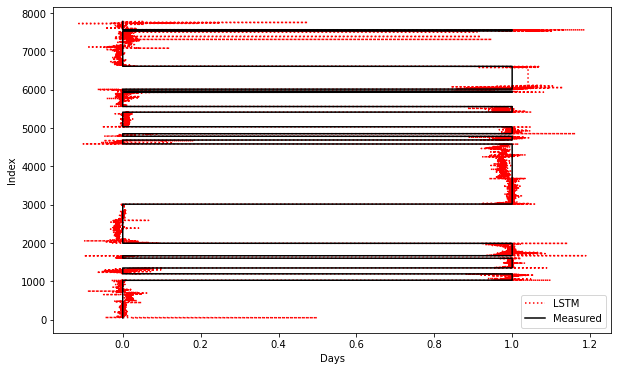

time: 1.77 s (started: 2020-12-26 11:40:45 +00:00)


In [ ]:
X = []
Y = []
for j in range(window, len(data)-251): 
  X.append(Xs[j-window:j,:])
  Y.append(Ys[j])
X, Y = np.asarray(X).astype(np.float32), np.asarray(Y).astype(np.float32)
Yp = model.predict(X)
Yu = s2.inverse_transform(Yp)
Ym = s2.inverse_transform(Y)
plt.figure(figsize=(10,6))
plt.plot(Yu , data[window:len(data)-251].index,'r:',label='LSTM')
plt.plot(Ym , data[window:len(data)-251].index,'k',label='Measured')
plt.xlabel('Days')
plt.ylabel('Index')
plt.legend()
plt.show()


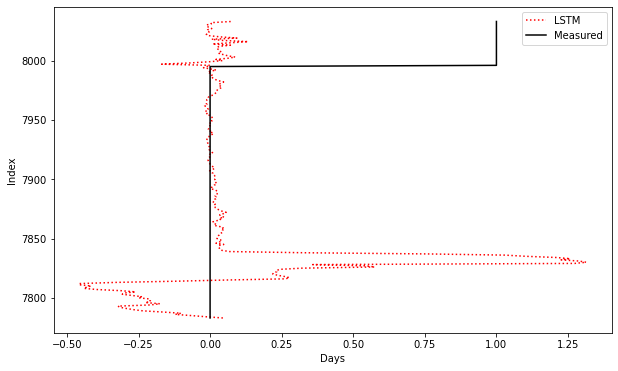

time: 283 ms (started: 2020-12-26 11:40:47 +00:00)


In [ ]:
X = []
Y = []
for j in range(7783, len(data)): 
  X.append(Xs[j-window:j,:])
  Y.append(Ys[j])
X, Y = np.asarray(X).astype(np.float32), np.asarray(Y).astype(np.float32)
Yp = model.predict(X)
Yu = s2.inverse_transform(Yp)
Ym = s2.inverse_transform(Y)
plt.figure(figsize=(10,6))
plt.plot(Yu , data[7783:len(data)].index,'r:',label='LSTM')
plt.plot(Ym , data[7783:len(data)].index,'k',label='Measured')
plt.xlabel('Days')
plt.ylabel('Index')
plt.legend()
plt.show()

In [ ]:
def generate_X():
    while True:
      for j in range(window,len(data)):
        X=[]
        X.append(Xs[j-window:j,:])
        X = np.array(X)
        yield X


def generate_y():
    while True:
        for j in range(window, len(data)):
          Y=[]
          Y.append(Ys[j])
          Y = np.array(Y)
          yield Y

time: 7.86 ms (started: 2020-12-26 10:45:28 +00:00)


In [ ]:
def batch_generator(batch_size, gen_x,gen_y): 

    batch_features = np.zeros((batch_size,window, 9))
    batch_labels = np.zeros((batch_size,window))

    while True:
        for i in range(batch_size):
            batch_features[i] = next(gen_x)
            batch_labels[i] = next(gen_y)
        yield batch_features, batch_labels

time: 4.83 ms (started: 2020-12-26 10:45:28 +00:00)


In [ ]:
model.fit_generator(batch_generator(32, generate_X(), generate_y()),
                    steps_per_epoch=(len(data)/window), epochs=2, verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
174/174 [==============================] - 5s 8ms/step - loss: 0.0932
Epoch 2/2
174/174 [==============================] - 1s 8ms/step - loss: 0.0142


time: 13.3 s (started: 2020-12-26 10:45:28 +00:00)


In [ ]:
def generate_X():
    while True:
      for j in range(7000,len(data)):
        X=[]
        X.append(Xs[j-window:j,:])
        X = np.array(X)
        yield X


def generate_y():
    while True:
        for j in range(7000, len(data)):
          Y=[]
          Y.append(Ys[j])
          Y = np.array(Y)
          yield Y

time: 6.33 ms (started: 2020-12-26 10:45:41 +00:00)


In [ ]:
def batch_generator(batch_size, gen_x,gen_y): 

    batch_features = np.zeros((batch_size,window, 9))
    batch_labels = np.zeros((batch_size,window))

    while True:
        for i in range(batch_size):
            batch_features[i] = next(gen_x)
            batch_labels[i] = next(gen_y)
        yield batch_features, batch_labels

time: 4.26 ms (started: 2020-12-26 10:45:41 +00:00)


In [ ]:
testPredict = model.predict_generator(batch_generator(32, generate_X(), generate_y()))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


KeyboardInterrupt: ignored

time: 2.85 s (started: 2020-12-26 10:55:19 +00:00)


In [ ]:
Yp = model.predict_generator(batch_generator(32, generate_X(), generate_y()))
Yu = s2.inverse_transform(Yp)
Ym = s2.inverse_transform(Y)
plt.figure(figsize=(10,6))
plt.plot(Yu , df[training_indexes[count]+window:no_of_persons[count]].index,'r:',label='LSTM')
plt.plot(Ym , df[training_indexes[count]+window:no_of_persons[count]].index,'k',label='Measured')
plt.xlabel('Days')
plt.ylabel('Index')
plt.legend()
plt.show()

Patient :  44


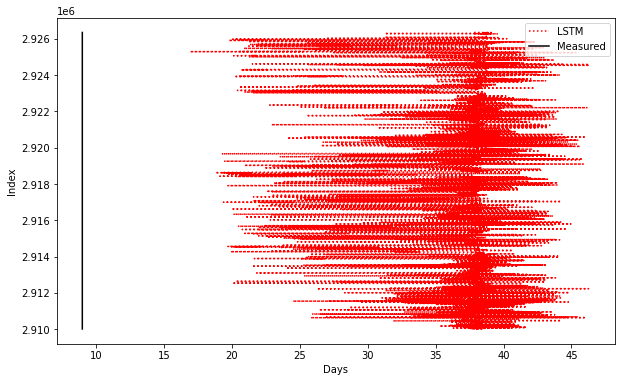

Patient :  45


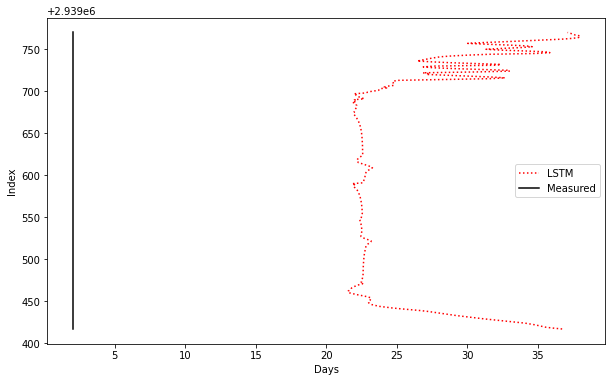

time: 51.2 s (started: 2020-12-21 15:38:25 +00:00)


In [ ]:
count= 36
window = 3000

for i in range(44,46):
  X = []
  Y = []
  if(i not in missing):
    print('Patient : ',i)
    window = 3000
    window = min(window,no_of_persons[count]-training_indexes[count]-1)
    for j in range(training_indexes[count]+window, no_of_persons[count]):
      
      X.append(Xs[j-window:j,:])
      Y.append(Ys[j])
    X, Y = np.array(X), np.array(Y)
    Yp = model.predict(X)
    Yu = s2.inverse_transform(Yp)
    Ym = s2.inverse_transform(Y)
    plt.figure(figsize=(10,6))
    plt.plot(Yu , df[training_indexes[count]+window:no_of_persons[count]].index,'r:',label='LSTM')
    plt.plot(Ym , df[training_indexes[count]+window:no_of_persons[count]].index,'k',label='Measured')
    plt.xlabel('Days')
    plt.ylabel('Index')
    plt.legend()
    plt.show()
    count=count+1

In [ ]:
#Pat01['DateTime'] = df.loc[df['PATIENT']=='HP01']['DateTime']

time: 697 µs (started: 2020-12-23 12:29:03 +00:00)


In [ ]:
Pat01one = Pat01.loc[Pat01['DateTime'].dt.date==pd.Timestamp('2019-09-03')]
#Pat01['DateTime'].dt.date

time: 77.4 ms (started: 2020-12-23 12:40:06 +00:00)


In [ ]:
round(Pat01one.groupby(Pat01one.DateTime.dt.hour).mean())

,ACT,Angle,Spin
DateTime,,,
10,7.0,3.0,5.0
11,3.0,2.0,3.0
12,5.0,3.0,4.0
13,5.0,3.0,4.0
14,2.0,2.0,2.0
15,3.0,4.0,5.0
16,0.0,0.0,0.0
17,0.0,0.0,0.0
18,0.0,0.0,0.0


time: 19.9 ms (started: 2020-12-23 12:40:10 +00:00)


In [ ]:
# Group the data by the index's hour value, then aggregate by the average
t = df.groupby(df.DateTime.dt.hour).agg(pd.Series.mode)

time: 1.13 s (started: 2020-12-23 12:22:31 +00:00)


In [ ]:
print(t)

          ACT  Angle  Spin PATIENT
DateTime                          
0         0.0    0.0   0.0    HP21
1         0.0    0.0   0.0    HP21
2         0.0    0.0   0.0    HP21
3         0.0    0.0   0.0    HP21
4         0.0    0.0   0.0    HP21
5         0.0    0.0   0.0    HP21
6         0.0    0.0   0.0    HP21
7         0.0    0.0   0.0    HP21
8         0.0    0.0   0.0    HP21
9         0.0    0.0   0.0    HP21
10        0.0    0.0   0.0    HP21
11        0.0    0.0   0.0    HP21
12        0.0    0.0   0.0    HP21
13        0.0    0.0   0.0    HP21
14        0.0    0.0   0.0    HP21
15        0.0    0.0   0.0    HP21
16        0.0    0.0   0.0    HP21
17        0.0    0.0   0.0    HP21
18        0.0    0.0   0.0    HP21
19        0.0    0.0   0.0    HP21
20        0.0    0.0   0.0    HP21
21        0.0    0.0   0.0    HP21
22        0.0    0.0   0.0    HP21
23        0.0    0.0   0.0    HP21
time: 13.4 ms (started: 2020-12-23 12:22:34 +00:00)


In [ ]:
df.groupby(df.DateTime.).value_col.sum()

AttributeError: ignored

time: 15.5 ms (started: 2020-12-23 12:08:13 +00:00)


In [ ]:
df.describe()

,ACT,Angle,Spin
count,2.939771e+06,2.939771e+06,2.939771e+06
mean,7.676912e+00,3.579843e+00,3.164388e+00
std,4.142520e+01,3.737610e+00,3.773796e+00
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.310000e+00,3.000000e+00,1.964812e+00
75%,7.508571e+00,5.354477e+00,4.179399e+00
max,6.080000e+03,1.500000e+01,1.500000e+01


time: 214 ms (started: 2020-12-21 12:59:23 +00:00)


In [ ]:
missing = [12, 17, 26, 19, 27, 31, 40, 46]

time: 1.21 ms (started: 2020-12-21 12:59:23 +00:00)


In [ ]:
df.loc[df.PATIENT == 'HP02']

,ACT,Angle,Spin,PATIENT,DateTime
161122,1.44,12.0,0.0,HP02,2019-09-26 01:40:58
161123,1.31,12.0,0.0,HP02,2019-09-26 01:41:08
161124,1.31,12.0,0.0,HP02,2019-09-26 01:41:18
161125,1.31,12.0,0.0,HP02,2019-09-26 01:41:28
161126,1.38,12.0,0.0,HP02,2019-09-26 01:41:38
...,...,...,...,...,...
236103,1.69,1.0,11.0,HP02,2019-10-04 16:36:46
236104,1.62,1.0,11.0,HP02,2019-10-04 16:36:56
236105,1.50,1.0,11.0,HP02,2019-10-04 16:37:06
236106,1.50,1.0,11.0,HP02,2019-10-04 16:37:16


time: 181 ms (started: 2020-12-21 12:59:23 +00:00)


In [ ]:
no_of_persons = []
for i in range(1,46):
  if(i not in missing):
    if(i<10):
      name = 'HP0'+ str(i)
    else:
      name = 'HP'+ str(i)
    #data.loc[data.PATIENT == name, 'dead'] = 0

    no_of_persons.append(df.loc[df.PATIENT == name].index[-1]+1)

time: 5.79 s (started: 2020-12-21 12:59:24 +00:00)


In [ ]:
#print(no_of_persons)

time: 771 µs (started: 2020-12-21 12:59:30 +00:00)


In [ ]:
df = df[['ACT', 'Angle', 'Spin', 'PATIENT', 'DateTime', 'dead']]

time: 93.4 ms (started: 2020-12-21 12:59:41 +00:00)


In [ ]:
df.loc[df.PATIENT == 'HP01', 'Days'] = 19
df.loc[df.PATIENT == 'HP02', 'Days'] = 9
df.loc[df.PATIENT == 'HP03', 'Days'] = 4
df.loc[df.PATIENT == 'HP04', 'Days'] = 2
df.loc[df.PATIENT == 'HP05', 'Days'] = 11
df.loc[df.PATIENT == 'HP06', 'Days'] = 2
df.loc[df.PATIENT == 'HP07', 'Days'] = 4
df.loc[df.PATIENT == 'HP08', 'Days'] = 3
df.loc[df.PATIENT == 'HP09', 'Days'] = 2
df.loc[df.PATIENT == 'HP10', 'Days'] = 5
df.loc[df.PATIENT == 'HP11', 'Days'] = 11
df.loc[df.PATIENT == 'HP13', 'Days'] = 4
df.loc[df.PATIENT == 'HP14', 'Days'] = 14
df.loc[df.PATIENT == 'HP15', 'Days'] = 3
df.loc[df.PATIENT == 'HP16', 'Days'] = 23
df.loc[df.PATIENT == 'HP18', 'Days'] = 13
df.loc[df.PATIENT == 'HP20', 'Days'] = 1
df.loc[df.PATIENT == 'HP21', 'Days'] = 28
df.loc[df.PATIENT == 'HP22', 'Days'] = 24
df.loc[df.PATIENT == 'HP23', 'Days'] = 14
df.loc[df.PATIENT == 'HP24', 'Days'] = 5
df.loc[df.PATIENT == 'HP25', 'Days'] = 5
df.loc[df.PATIENT == 'HP28', 'Days'] = 4
df.loc[df.PATIENT == 'HP29', 'Days'] = 8
df.loc[df.PATIENT == 'HP30', 'Days'] = 17
df.loc[df.PATIENT == 'HP32', 'Days'] = 7
df.loc[df.PATIENT == 'HP33', 'Days'] = 9
df.loc[df.PATIENT == 'HP34', 'Days'] = 8
df.loc[df.PATIENT == 'HP35', 'Days'] = 2
df.loc[df.PATIENT == 'HP36', 'Days'] = 3
df.loc[df.PATIENT == 'HP37', 'Days'] = 5
df.loc[df.PATIENT == 'HP38', 'Days'] = 6
df.loc[df.PATIENT == 'HP39', 'Days'] = 15
df.loc[df.PATIENT == 'HP41', 'Days'] = 17
df.loc[df.PATIENT == 'HP42', 'Days'] = 2
df.loc[df.PATIENT == 'HP43', 'Days'] = 10
df.loc[df.PATIENT == 'HP44', 'Days'] = 9
df.loc[df.PATIENT == 'HP45', 'Days'] = 2

time: 6.62 s (started: 2020-12-21 12:59:41 +00:00)


LSTM

In [ ]:
# Scale features
s1 = MinMaxScaler(feature_range=(-1,1))
Xs = s1.fit_transform(df[['ACT','Angle', 'Spin']])

time: 84.4 ms (started: 2020-12-21 12:59:49 +00:00)


In [ ]:
# Scale predicted value
s2 = MinMaxScaler(feature_range=(-1,1))
Ys = s2.fit_transform(df[['Days']])

time: 26.2 ms (started: 2020-12-21 12:59:49 +00:00)


In [ ]:
#s=len(df.loc[df.PATIENT == 'HP01'].index)

time: 824 µs (started: 2020-12-21 12:59:49 +00:00)


In [ ]:
#s

time: 757 µs (started: 2020-12-21 12:59:49 +00:00)


In [ ]:
sub = []
for i in range(1,46):
  if(i not in missing):
    if(i<10):
      name = 'HP0'+ str(i)
    else:
      name = 'HP'+ str(i)
    #data.loc[data.PATIENT == name, 'dead'] = 0

    sub.append(int(len(df.loc[df.PATIENT == name].index)/4))

time: 5.75 s (started: 2020-12-21 12:59:49 +00:00)


In [ ]:
#sub

time: 895 µs (started: 2020-12-21 12:59:54 +00:00)


In [ ]:
df.loc[df.PATIENT == 'HP02']

,ACT,Angle,Spin,PATIENT,DateTime,dead,Days
161122,1.44,12.0,0.0,HP02,2019-09-26 01:40:58,0.0,9.0
161123,1.31,12.0,0.0,HP02,2019-09-26 01:41:08,0.0,9.0
161124,1.31,12.0,0.0,HP02,2019-09-26 01:41:18,0.0,9.0
161125,1.31,12.0,0.0,HP02,2019-09-26 01:41:28,0.0,9.0
161126,1.38,12.0,0.0,HP02,2019-09-26 01:41:38,0.0,9.0
...,...,...,...,...,...,...,...
236103,1.69,1.0,11.0,HP02,2019-10-04 16:36:46,0.0,9.0
236104,1.62,1.0,11.0,HP02,2019-10-04 16:36:56,0.0,9.0
236105,1.50,1.0,11.0,HP02,2019-10-04 16:37:06,0.0,9.0
236106,1.50,1.0,11.0,HP02,2019-10-04 16:37:16,0.0,9.0


time: 178 ms (started: 2020-12-21 12:59:54 +00:00)


In [ ]:
training_indexes = (no_of_persons).copy()
for i in range(0, 38):
  training_indexes[i] =  (training_indexes[i] - sub[i])

time: 1.42 ms (started: 2020-12-21 12:59:55 +00:00)


In [ ]:
ella_count=[]
for i in range(1,46):
  if(i not in missing):
    if(i<10):
      name = 'HP0'+ str(i)
    else:
      name = 'HP'+ str(i)
    #data.loc[data.PATIENT == name, 'dead'] = 0

    ella_count.append(df.loc[df.PATIENT == name].index[-1]-df.loc[df.PATIENT == name].index[0]+1)

time: 11.6 s (started: 2020-12-21 12:59:55 +00:00)


In [ ]:
for i in range(0,38):
  print('Ending index : ' ,no_of_persons[i],' Training Ending index : ' ,training_indexes[i],' Traning count : ' ,ella_count[i]-sub[i],' Testing count : ' ,sub[i],' otal count : ' ,ella_count[i])

Ending index :  161122  Training Ending index :  120842  Traning count :  120842  Testing count :  40280  otal count :  161122
Ending index :  236108  Training Ending index :  217362  Traning count :  56240  Testing count :  18746  otal count :  74986
Ending index :  269491  Training Ending index :  261146  Traning count :  25038  Testing count :  8345  otal count :  33383
Ending index :  284021  Training Ending index :  280389  Traning count :  10898  Testing count :  3632  otal count :  14530
Ending index :  372829  Training Ending index :  350627  Traning count :  66606  Testing count :  22202  otal count :  88808
Ending index :  382772  Training Ending index :  380287  Traning count :  7458  Testing count :  2485  otal count :  9943
Ending index :  412370  Training Ending index :  404971  Traning count :  22199  Testing count :  7399  otal count :  29598
Ending index :  433571  Training Ending index :  428271  Traning count :  15901  Testing count :  5300  otal count :  21201
Endin

In [ ]:
#Bidirectional
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128, 
      input_shape=(3000, 3)
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

time: 34.1 ms (started: 2020-12-21 13:00:11 +00:00)


In [ ]:
def generate_X():
    while True:
      for j in range(3000,2848958):
        X=[]
        X.append(Xs[j-3000:j,:])
        X = np.array(X)
        yield X


def generate_y():
    while True:
        for j in range(3000, 2848958):
          Y=[]
          Y.append(Ys[j])
          Y = np.array(Y)
          yield Y

time: 4.54 ms (started: 2020-12-21 13:00:12 +00:00)


In [ ]:
def batch_generator(batch_size, gen_x,gen_y): 

    batch_features = np.zeros((batch_size,3000, 3))
    batch_labels = np.zeros((batch_size,3000))

    while True:
        for i in range(batch_size):
            batch_features[i] = next(gen_x)
            batch_labels[i] = next(gen_y)
        yield batch_features, batch_labels

time: 3.1 ms (started: 2020-12-21 13:00:14 +00:00)


In [ ]:
model.fit_generator(batch_generator(300, generate_X(), generate_y()),
                    steps_per_epoch=(2848958/300), epochs=2, verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
9496/9496 [==============================] - 4739s 499ms/step - loss: 0.0107
Epoch 2/2
9496/9496 [==============================] - 4733s 498ms/step - loss: 0.0191


time: 2h 37min 52s (started: 2020-12-21 13:00:15 +00:00)


In [ ]:
model.save('/content/drive/MyDrive/Taiwan Hospice Project/BiDirectionalwithoutdays')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Taiwan Hospice Project/BiDirectionalwithoutdays/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Taiwan Hospice Project/BiDirectionalwithoutdays/assets


time: 14.3 s (started: 2020-12-21 15:38:09 +00:00)


In [ ]:
model.save('/content/drive/MyDrive/Taiwan Hospice Project/BiDirectionalwithoutdays.h5')

time: 43.5 ms (started: 2020-12-21 15:38:25 +00:00)


Patient :  44


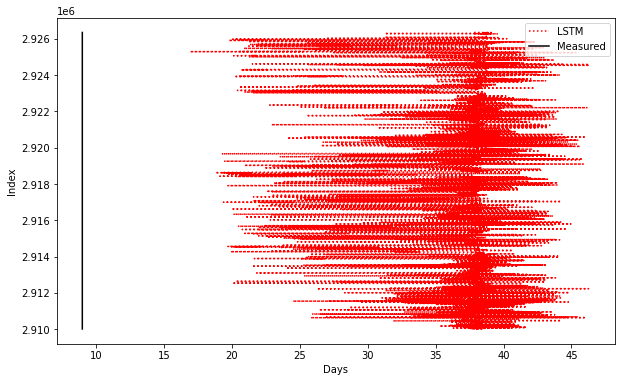

Patient :  45


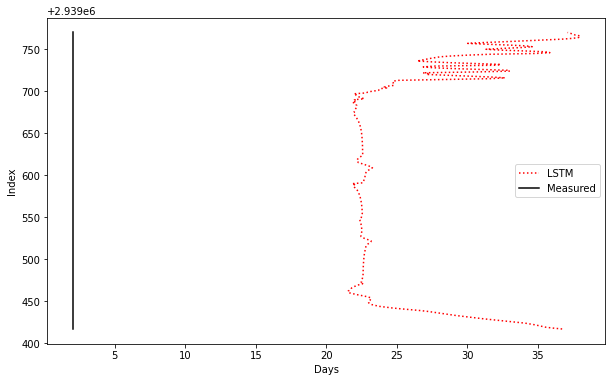

time: 51.2 s (started: 2020-12-21 15:38:25 +00:00)


In [ ]:
count= 36
window = 3000

for i in range(44,46):
  X = []
  Y = []
  if(i not in missing):
    print('Patient : ',i)
    window = 3000
    window = min(window,no_of_persons[count]-training_indexes[count]-1)
    for j in range(training_indexes[count]+window, no_of_persons[count]):
      
      X.append(Xs[j-window:j,:])
      Y.append(Ys[j])
    X, Y = np.array(X), np.array(Y)
    Yp = model.predict(X)
    Yu = s2.inverse_transform(Yp)
    Ym = s2.inverse_transform(Y)
    plt.figure(figsize=(10,6))
    plt.plot(Yu , df[training_indexes[count]+window:no_of_persons[count]].index,'r:',label='LSTM')
    plt.plot(Ym , df[training_indexes[count]+window:no_of_persons[count]].index,'k',label='Measured')
    plt.xlabel('Days')
    plt.ylabel('Index')
    plt.legend()
    plt.show()
    count=count+1